**Exercise 3.11 (Continuation of Exercise 3.5)**.  Return to the `wages` series.

**(a)**  Consider the residuals from a least squares fit of a quadratic time trend.

**(b)**  Perform a runs test on the standardized residuals and interpret the results.

**(c)**  Calculate and interpret the sample autocorrelations for the standardized residuals.

**(d)**  Investigate the normality of the standardized residuals (error terms).  Consider histograms and normal probability plots.  Interpret the plots.

**Solution**.

**(a)**

In [1]:
%run utils.py

In [2]:
import pandas as pd
from statsmodels.formula.api import ols

data = pd.read_csv('../data/wages.dat')
data['date'] = pd.date_range('1981-07', periods=len(data), freq='M')
data['t'] = data['date'].dt.year + (data['date'].dt.month - 1) / 12

                            OLS Regression Results                            
Dep. Variable:                  wages   R-squared:                       0.986
Model:                            OLS   Adj. R-squared:                  0.986
Method:                 Least Squares   F-statistic:                     2494.
Date:                Sat, 02 May 2020   Prob (F-statistic):           4.53e-65
Time:                        15:35:44   Log-Likelihood:                 103.27
No. Observations:                  72   AIC:                            -200.5
Df Residuals:                      69   BIC:                            -193.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept      -8.495e+04   1.02e+04     -8.

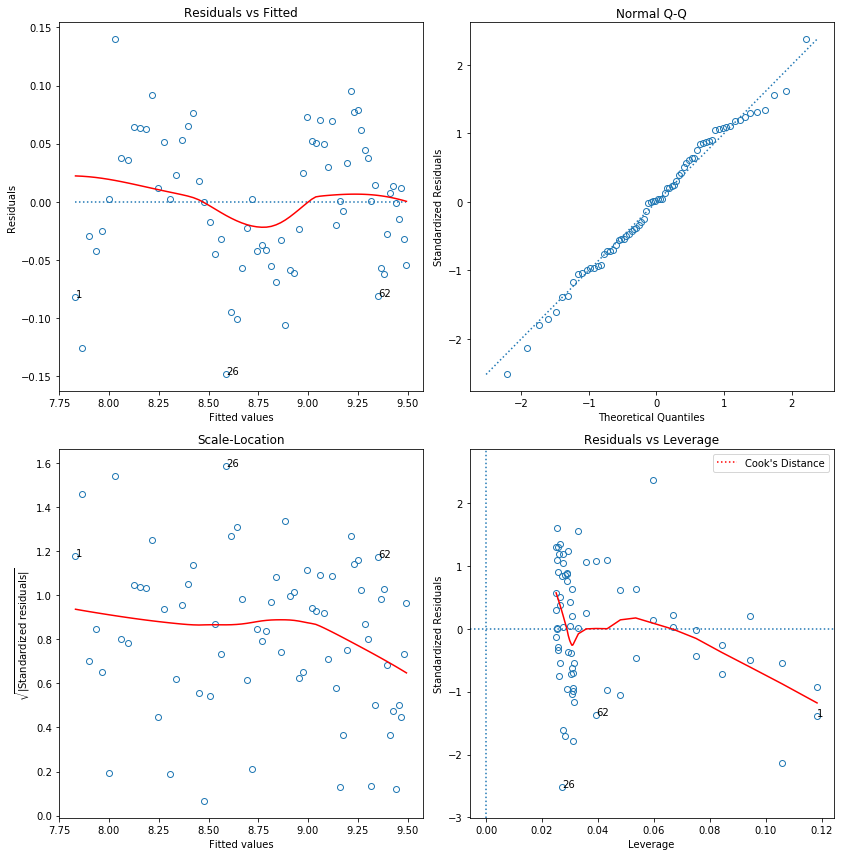

In [3]:
model = ols("wages ~ t + np.power(t, 2)", data=data).fit()
print(model.summary())
plot_summary(model)

Very high adjusted R square, but seasonality still present in residuals.

**(b)**

In [4]:
from statsmodels.sandbox.stats.runs import runstest_1samp

z_stat, p_value = runstest_1samp(model.resid_pearson, cutoff=0, correction=False)
print('Z statistic:\t %.3f' % z_stat)
print('p-value:\t %e' % p_value)

Z statistic:	 -5.200
p-value:	 1.996783e-07


The Runs test gives very high confidence (p-value under 2e-7) that the standardized model residuals are not white noise.

**(c)**

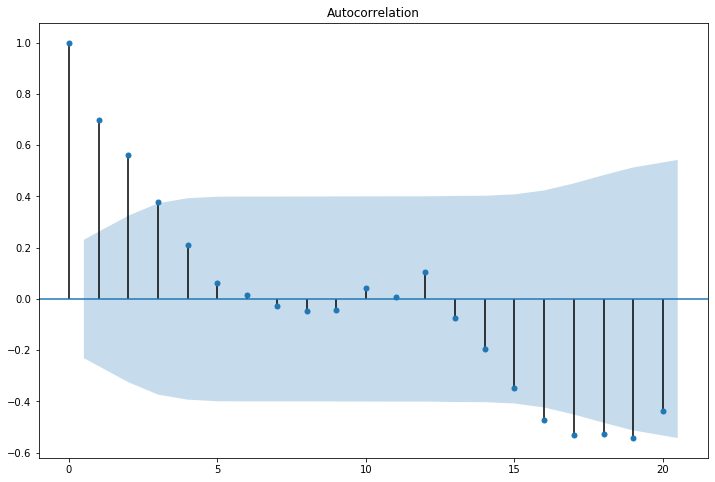

In [5]:
import matplotlib as mpl

with mpl.rc_context():
    mpl.rc("figure", figsize=(12, 8))
    sm.graphics.tsa.plot_acf(model.resid_pearson, lags=20)

plt.show()

Many autocorrelations are present past the standard errors.  The wave format suggests some seasonality.

**(e)**

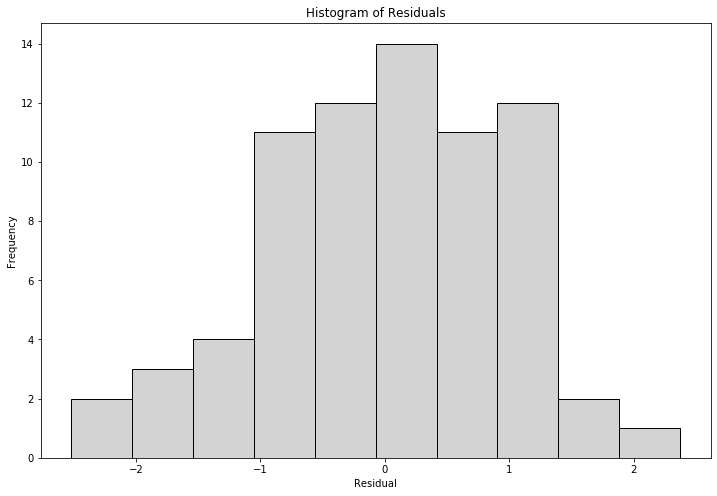

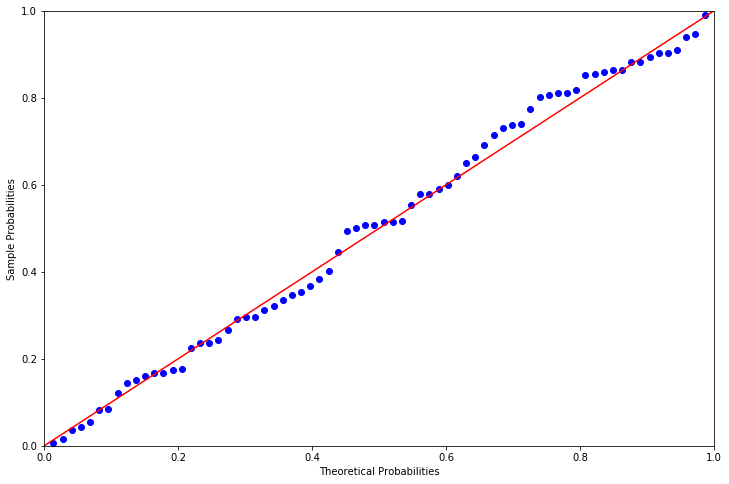

In [6]:
plt.figure(figsize=(12, 8))
plt.hist(model.resid_pearson, edgecolor='black', facecolor='lightgray')
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
plt.show()

import matplotlib as mpl

with mpl.rc_context():
    mpl.rc("figure", figsize=(12, 8))
    sm.ProbPlot(model.resid_pearson).ppplot(line='45')

plt.show()

Histogram of residuals seems skewed.  The Q-Q plot is overall aligned, but also indicates a non-ideal fit.

**Exercise 3.12 (Continuation of Exercise 3.6)**.  Consider the time series in the data file `beersales`.

**(a)**  Obtain the residuals from the least squares fit of the seasonal means plus quadratic time trend model.

**(b)**  Perform a runs test on the standardized residuals and interpret the results.

**(c)**  Calculate and interpret the sample autocorrelations for the standardized residuals.

**(d)**  Investigate the normality of the standardized residuals (error terms).  Consider histograms and normal probability plots.  Interpret the plots.

**Solution**.

**(a)**

In [7]:
data = pd.read_csv('../data/beersales.dat')
data['date'] = pd.date_range('1975-01', periods=len(data), freq='M')
data['t'] = data['date'].dt.year + (data['date'].dt.month - 1) / 12
data['month'] = data['date'].dt.month

                            OLS Regression Results                            
Dep. Variable:              beersales   R-squared:                       0.910
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                     138.8
Date:                Sat, 02 May 2020   Prob (F-statistic):           9.38e-86
Time:                        15:35:45   Log-Likelihood:                -164.22
No. Observations:                 192   AIC:                             356.4
Df Residuals:                     178   BIC:                             402.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       -7.15e+04   8791.411     -8.

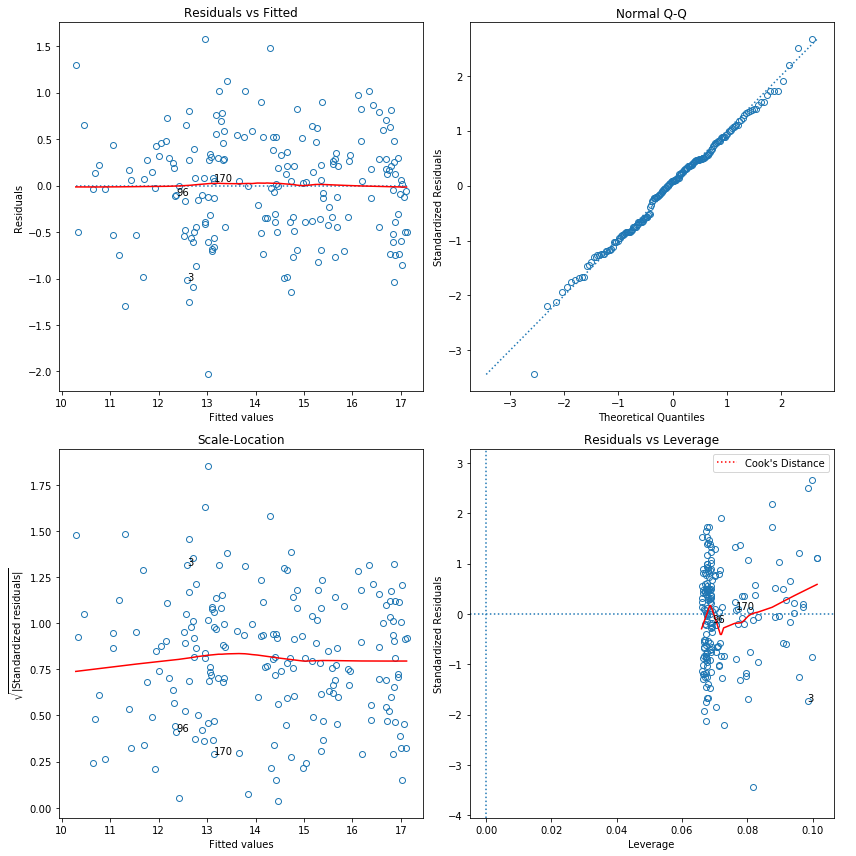

In [8]:
model = ols("beersales ~ t + np.power(t, 2) + C(month)", data=data).fit()
print(model.summary())
plot_summary(model)

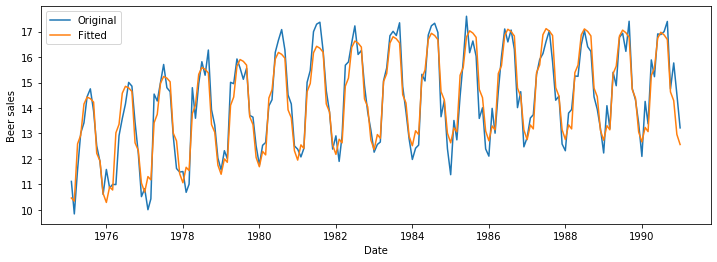

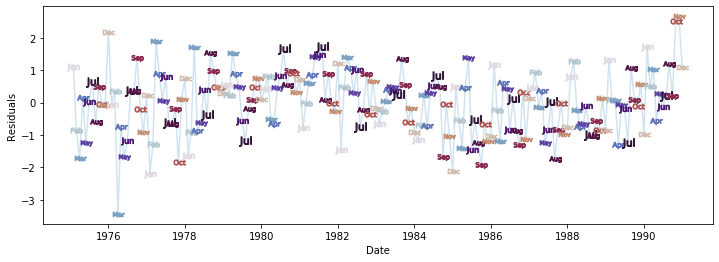

In [9]:
plt.figure(figsize=(12, 4))
plt.plot(data['date'], data['beersales'], label='Original')
plt.plot(data['date'], model.fittedvalues, label='Fitted')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Beer sales')
plt.show()

x, y = data['date'], model.resid_pearson
plot_monthly(x, y, 'Date', 'Residuals')

There is still some seasonality not captured in the data by the month factors.  But the adjusted R squared is 0.904, most coefficients (other than two months) have significant p-values, and the overall behavior of the timeseires seems to be captured.

**(b)**

In [10]:
from statsmodels.sandbox.stats.runs import runstest_1samp

z_stat, p_value = runstest_1samp(model.resid_pearson, cutoff=0, correction=False)
print('Z statistic:\t %.3f' % z_stat)
print('p-value:\t %e' % p_value)

Z statistic:	 -2.561
p-value:	 1.044643e-02


The Runs test still indicates that the residuals are not white noise, with a p-value of 0.01.

**(c)**

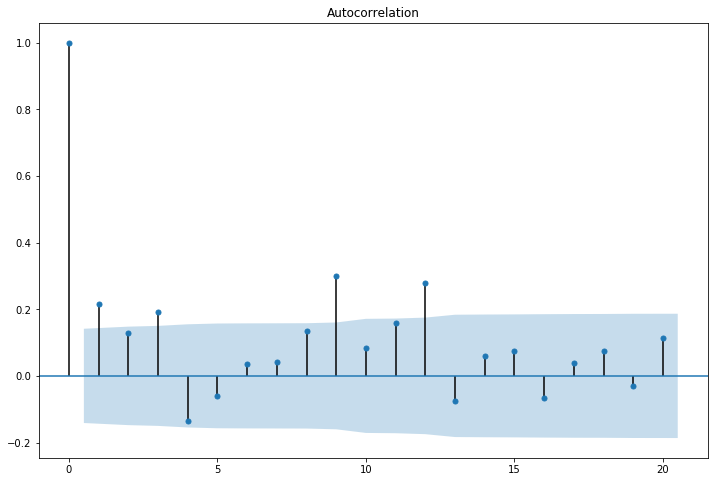

In [11]:
import matplotlib as mpl

with mpl.rc_context():
    mpl.rc("figure", figsize=(12, 8))
    sm.graphics.tsa.plot_acf(model.resid_pearson, lags=20)

plt.show()

Some of the autocorrelation lags are still fairly high -- such as at 9 and 12 -- indicating some seasonality not captured by the model.

**(d)**

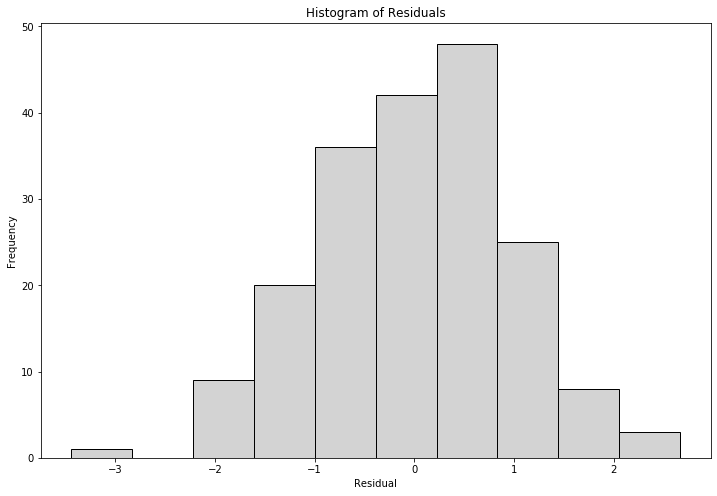

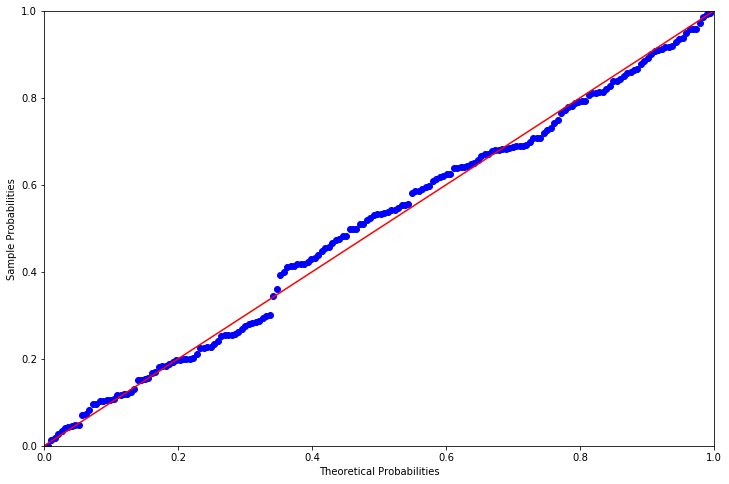

In [12]:
plt.figure(figsize=(12, 8))
plt.hist(model.resid_pearson, edgecolor='black', facecolor='lightgray')
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
plt.show()

import matplotlib as mpl

with mpl.rc_context():
    mpl.rc("figure", figsize=(12, 8))
    sm.ProbPlot(model.resid_pearson).ppplot(line='45')

plt.show()

Overall shape of histogram and Q-Q plot seem adequate, though there is a large tail on the negative side for the histogram.

**Exercise 3.13 (Continuation of Exercise 3.7)**.  Return to the `winnebago` time series.

**(a)**  Calculate the least squares residuals from a seasonal-means plus linear time trend model on the logarithm of the sales time series.

**(b)**  Perform a runs test on the standardized residuals and interpret the results.

**(c)**  Calculate and interpret the sample autocorrelations for the standardized residuals.

**(d)**  Investigate the normality of the standardized residuals (error terms).  Consider histograms and the normal probability plots.  Interpret the plots.

**Solution**.

**(a)**

In [13]:
data = pd.read_csv('../data/winnebago.dat')
data['date'] = pd.date_range('1966-11', periods=len(data), freq='M')
data['t'] = data['date'].dt.year + (data['date'].dt.month - 1) / 12
data['month'] = data['date'].dt.month

                            OLS Regression Results                            
Dep. Variable:      np.log(winnebago)   R-squared:                       0.895
Model:                            OLS   Adj. R-squared:                  0.870
Method:                 Least Squares   F-statistic:                     36.09
Date:                Sat, 02 May 2020   Prob (F-statistic):           1.09e-20
Time:                        15:35:47   Log-Likelihood:                -9.5955
No. Observations:                  64   AIC:                             45.19
Df Residuals:                      51   BIC:                             73.26
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       -997.3306     50.640    -19.

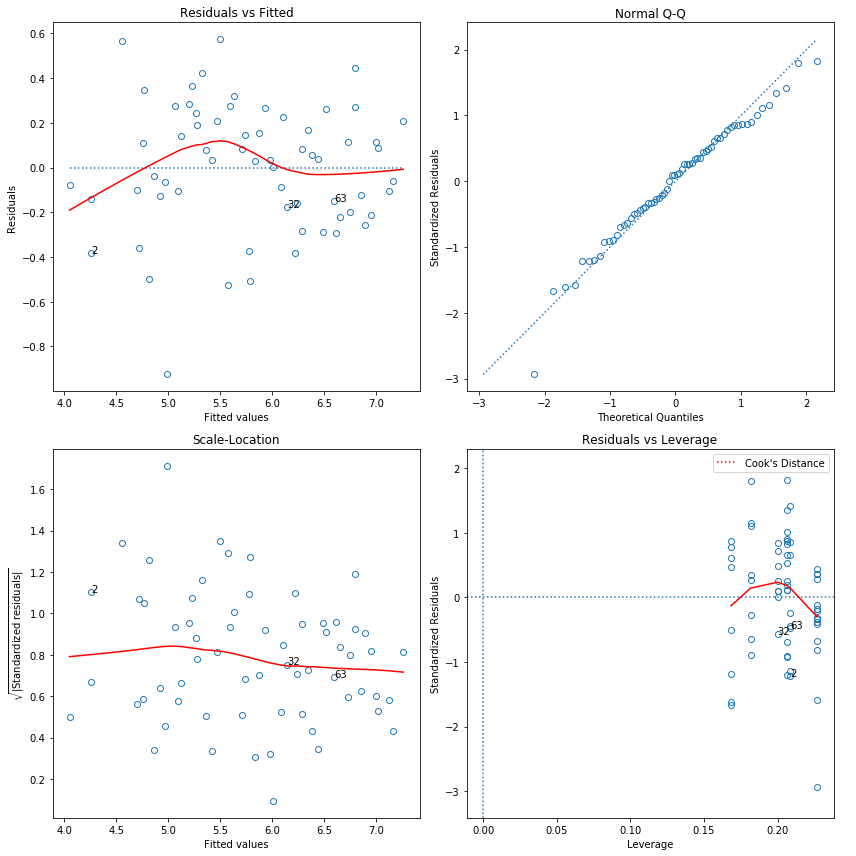

In [14]:
model = ols("np.log(winnebago) ~ t + C(month)", data=data).fit()
print(model.summary())
plot_summary(model)

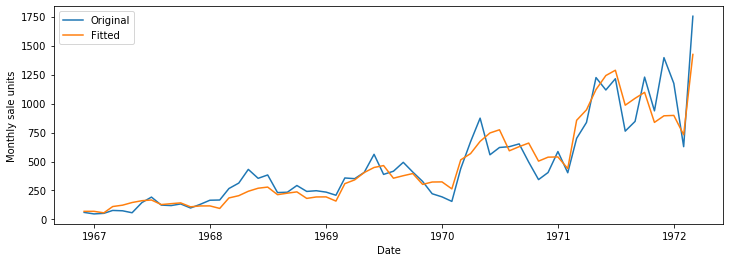

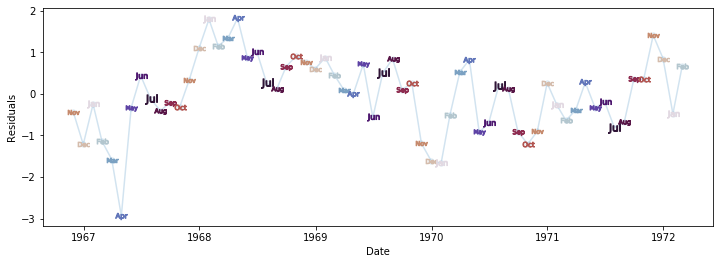

In [15]:
plt.figure(figsize=(12, 4))
plt.plot(data['date'], data['winnebago'], label='Original')
plt.plot(data['date'], np.exp(model.fittedvalues), label='Fitted')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Monthly sale units')
plt.show()

x, y = data['date'], model.resid_pearson
plot_monthly(x, y, 'Date', 'Residuals')

Most regression coefficients are significative, and adjusted R square is at 0.87.  Overall trend values seem to have been mostly removed, but some seasonality is still in place.

**(b)**

In [16]:
from statsmodels.sandbox.stats.runs import runstest_1samp

z_stat, p_value = runstest_1samp(model.resid_pearson, cutoff=0, correction=False)
print('Z statistic:\t %.3f' % z_stat)
print('p-value:\t %e' % p_value)

Z statistic:	 -3.743
p-value:	 1.820761e-04


The Runs test indicates, with p-value of 1.8e-4, that the residuals are not white noise.

**(c)**

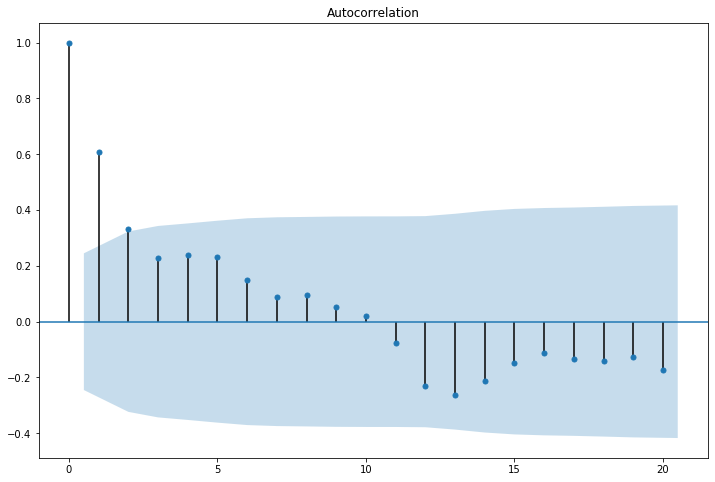

In [17]:
import matplotlib as mpl

with mpl.rc_context():
    mpl.rc("figure", figsize=(12, 8))
    sm.graphics.tsa.plot_acf(model.resid_pearson, lags=20)

plt.show()

Autocorrelation values are improved over previous models, but there is still a significant lag at $k = 1$, and some potentially meaningful lages at $k = 2, 3, 13$.

**(d)**

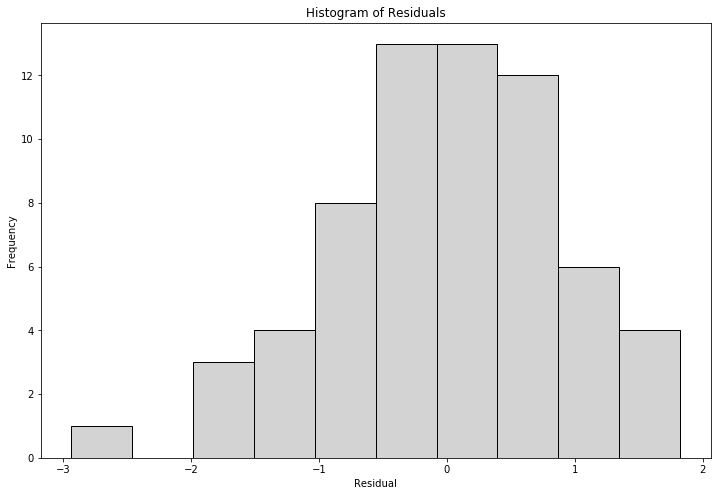

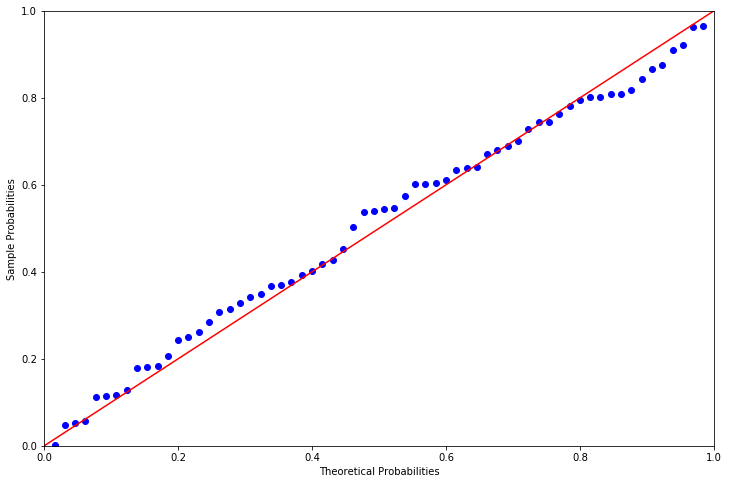

In [18]:
plt.figure(figsize=(12, 8))
plt.hist(model.resid_pearson, edgecolor='black', facecolor='lightgray')
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
plt.show()

import matplotlib as mpl

with mpl.rc_context():
    mpl.rc("figure", figsize=(12, 8))
    sm.ProbPlot(model.resid_pearson).ppplot(line='45')

plt.show()

Histogram of residuals seem skewed, while the Q-Q plot has a vague S shape, suggesting that the residuals are not normal.

**Exercise 3.14 (Continuation of Exercise 3.8)**.   The data file `retail` contains U.K monthly retail sales figures.

**(a)**  Obtain the least squares residuals from a seasonal-means plus linear time trend model.

**(b)**  Perform a runs test on the standardized residuals and interpret the results.

**(c)**  Calculate and interpret the sample autocorrelation for the standardized residuals.

**(d)**  Investigate the normality of the standardized residuals (error terms).  Consider histograms and normal probability plots.  Interpret the plots.

**Solution**.

**(a)**

In [19]:
data = pd.read_csv('../data/retail.dat')
data['date'] = pd.date_range('1986-01', periods=len(data), freq='M')
data['t'] = data['date'].dt.year + (data['date'].dt.month - 1) / 12
data['month'] = data['date'].dt.month

                            OLS Regression Results                            
Dep. Variable:                 retail   R-squared:                       0.977
Model:                            OLS   Adj. R-squared:                  0.976
Method:                 Least Squares   F-statistic:                     845.0
Date:                Sat, 02 May 2020   Prob (F-statistic):          6.46e-190
Time:                        15:35:48   Log-Likelihood:                -725.80
No. Observations:                 255   AIC:                             1478.
Df Residuals:                     242   BIC:                             1524.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept      -7249.3833     87.238    -83.

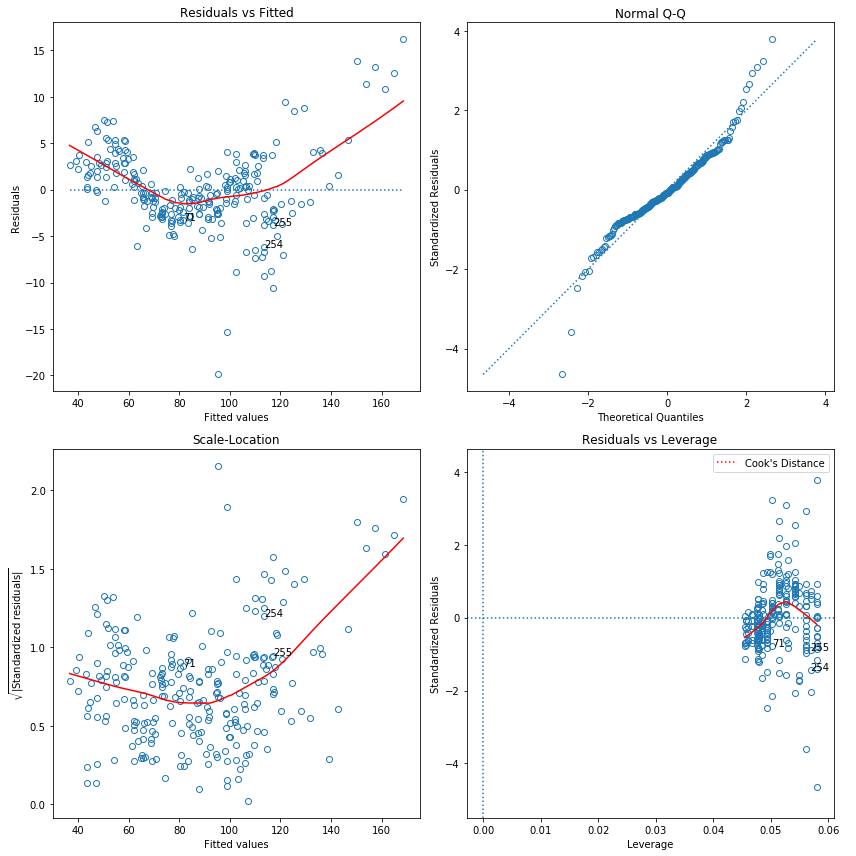

In [20]:
model = ols("retail ~ t + C(month)", data=data).fit()
print(model.summary())
plot_summary(model)

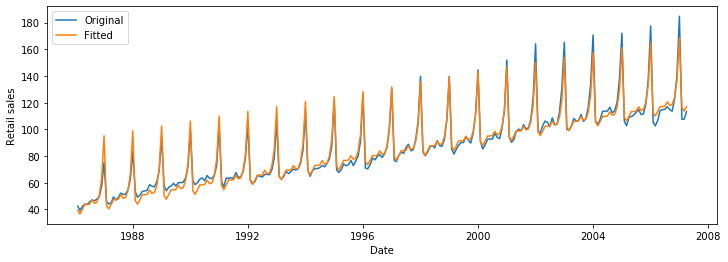

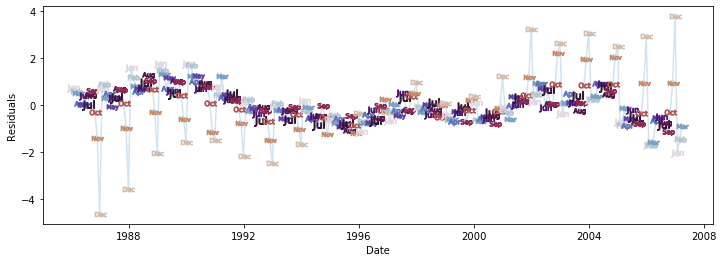

In [21]:
plt.figure(figsize=(12, 4))
plt.plot(data['date'], data['retail'], label='Original')
plt.plot(data['date'], model.fittedvalues, label='Fitted')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Retail sales')
plt.show()

x, y = data['date'], model.resid_pearson
plot_monthly(x, y, 'Date', 'Residuals')

Fairly high adjusted R squared, with all regression coefficient significants except for one month.  Some seasonality is still not captured.

**(b)**

In [22]:
from statsmodels.sandbox.stats.runs import runstest_1samp

z_stat, p_value = runstest_1samp(model.resid_pearson, cutoff=0, correction=False)
print('Z statistic:\t %.3f' % z_stat)
print('p-value:\t %e' % p_value)

Z statistic:	 -9.572
p-value:	 1.051160e-21


The Runs test indicates, with p-value of 1e-21, that the residuals are not white noise.

**(c)**

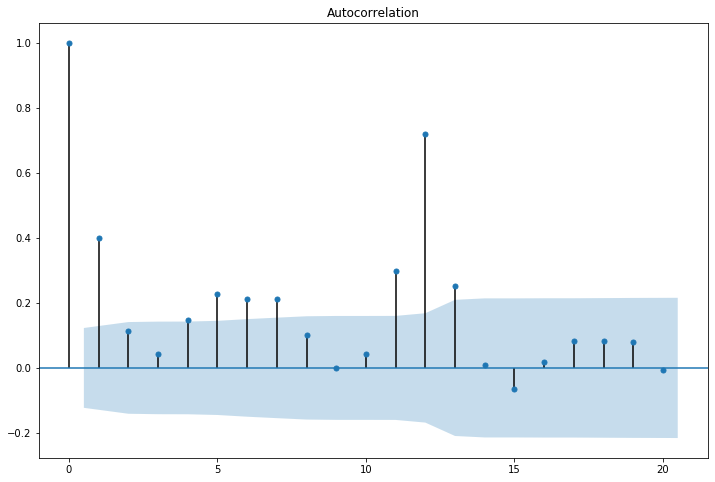

In [23]:
import matplotlib as mpl

with mpl.rc_context():
    mpl.rc("figure", figsize=(12, 8))
    sm.graphics.tsa.plot_acf(model.resid_pearson, lags=20)

plt.show()

Very large spike at lag $k = 12$.  Seasonality is not fully captured.

**(d)**

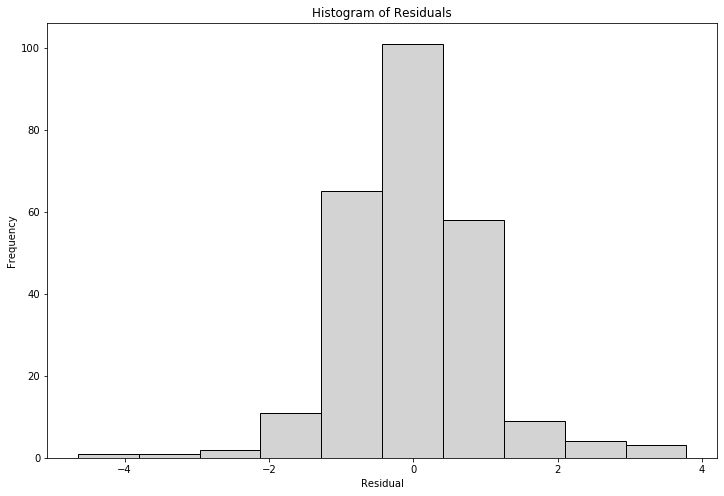

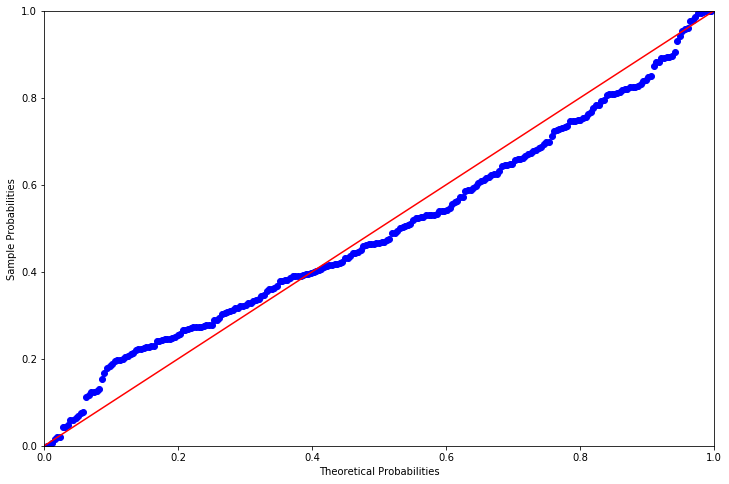

In [24]:
plt.figure(figsize=(12, 8))
plt.hist(model.resid_pearson, edgecolor='black', facecolor='lightgray')
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
plt.show()

import matplotlib as mpl

with mpl.rc_context():
    mpl.rc("figure", figsize=(12, 8))
    sm.ProbPlot(model.resid_pearson).ppplot(line='45')

plt.show()

While the histogram does not hint clearly at the large tails, the Q-Q plot is very S-shaped, indicating that the residuals are not normal.

**Exercise 3.15 (Continuation of Exercise 3.9)**.  Consider again the  `prescrip` time series.

**(a)**  Save the standardized results from a least squares fit of a coside trend with fundamental frequency 1/12 to the percentage change time series.

**(b)**  Perform a runs test on the standardized residuals and interpret the results.

**(c)**  Calculate and interpret the sample autocorrelations for the standardized residuals.

**(d)**  Investigate the normality of the standardized residuals (error terms).  Consider histograms and normal probability plots.  Interpret the plots.

**Solution**.

**(a)**

In [25]:
data = pd.read_csv('../data/prescrip.dat')
data['date'] = pd.date_range('1986-08', periods=len(data), freq='M')
data['t'] = data['date'].dt.year + (data['date'].dt.month - 1) / 12
data['month'] = data['date'].dt.month
data['percent_change'] = 100 * (data['prescrip'] / data['prescrip'].shift(1) - 1)

                            OLS Regression Results                            
Dep. Variable:         percent_change   R-squared:                       0.315
Model:                            OLS   Adj. R-squared:                  0.293
Method:                 Least Squares   F-statistic:                     14.70
Date:                Sat, 02 May 2020   Prob (F-statistic):           5.58e-06
Time:                        15:35:50   Log-Likelihood:                -136.44
No. Observations:                  67   AIC:                             278.9
Df Residuals:                      64   BIC:                             285.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

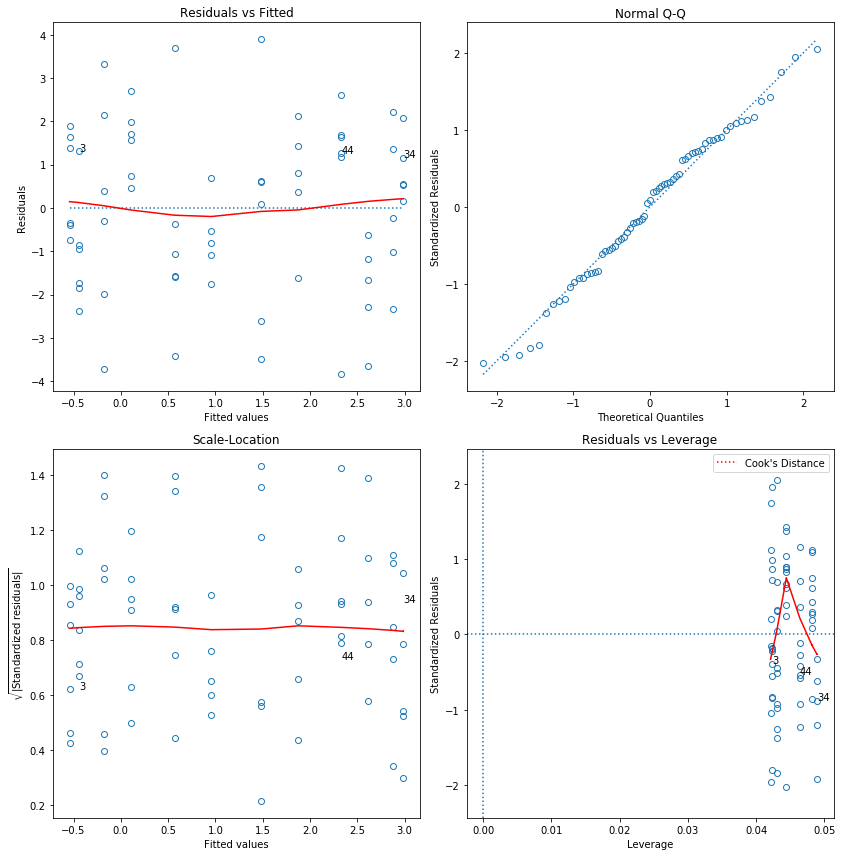

In [26]:
# t is in years, so the fundamental frequency is f = 1/12 year = 1 month

model = ols("percent_change ~ np.cos(2 * np.pi * 1 * t) + np.sin(2 * np.pi * 1 * t)", data=data).fit()
print(model.summary())
plot_summary(model)

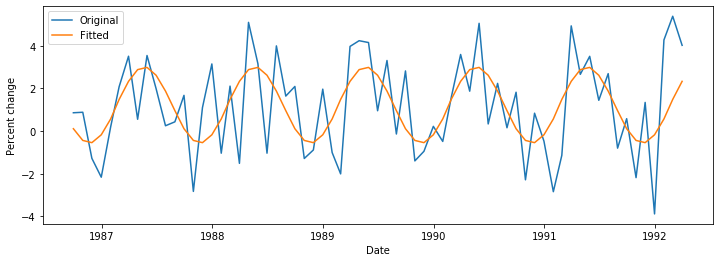

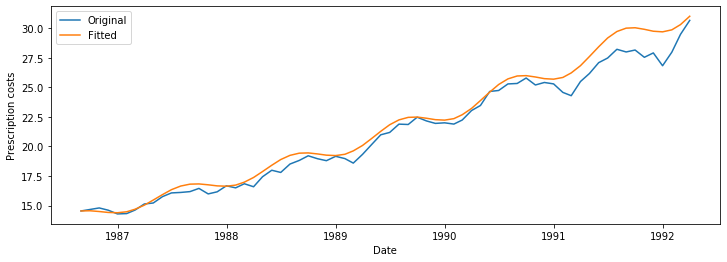

In [27]:
plt.figure(figsize=(12, 4))
plt.plot(data['date'], data['percent_change'], label='Original')
plt.plot(data['date'][1:], model.fittedvalues, label='Fitted')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Percent change')
plt.show()

fitted_ratio = pd.concat([pd.Series(1), np.cumprod(model.fittedvalues / 100 + 1)])

plt.figure(figsize=(12, 4))
plt.plot(data['date'], data['prescrip'], label='Original')
plt.plot(data['date'], fitted_ratio * data['prescrip'].values[0], label='Fitted')
plt.xlabel('Date')
plt.ylabel('Prescription costs')
plt.legend()
plt.show()

**(b)**

In [28]:
from statsmodels.sandbox.stats.runs import runstest_1samp

z_stat, p_value = runstest_1samp(model.resid_pearson, cutoff=0, correction=False)
print('Z statistic:\t %.3f' % z_stat)
print('p-value:\t %e' % p_value)

Z statistic:	 3.100
p-value:	 1.932014e-03


The Runs test indicates, with p-value of 1.9e-3, that the residuals are not white noise.  This is still under 0.01, but it is one of the best values seen so far.

**(c)**

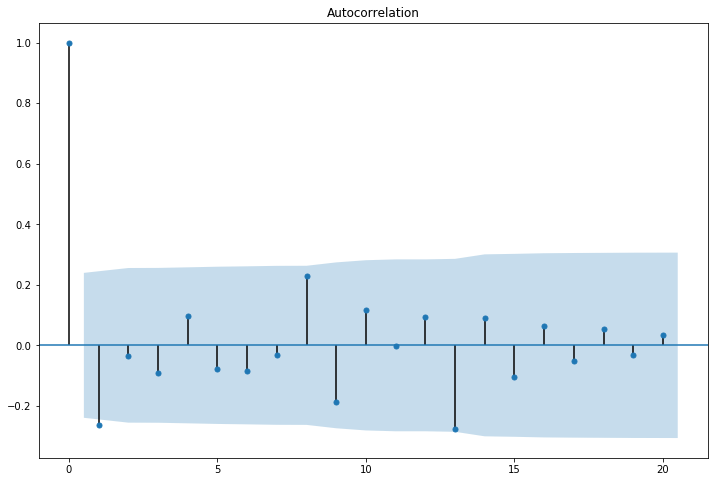

In [29]:
import matplotlib as mpl

with mpl.rc_context():
    mpl.rc("figure", figsize=(12, 8))
    sm.graphics.tsa.plot_acf(model.resid_pearson, lags=20)

plt.show()

Most autocorrelation values are this time inside the shaded area, other than the lag $k = 1$.  This would seem to indicate that no lags are particularly impactful by themselves.

**(d)**

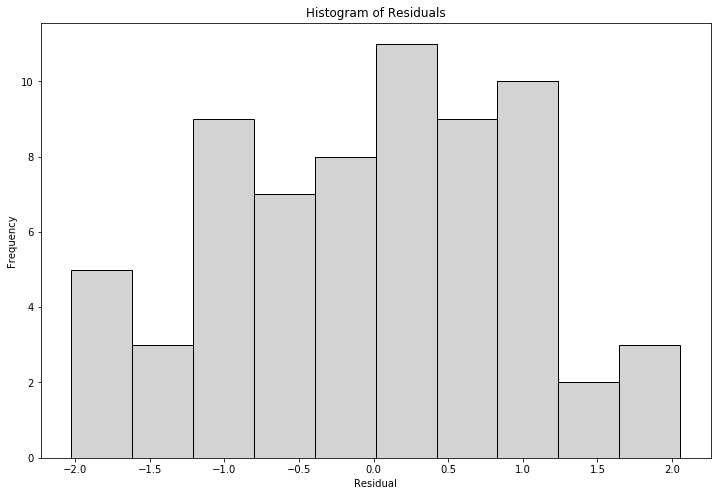

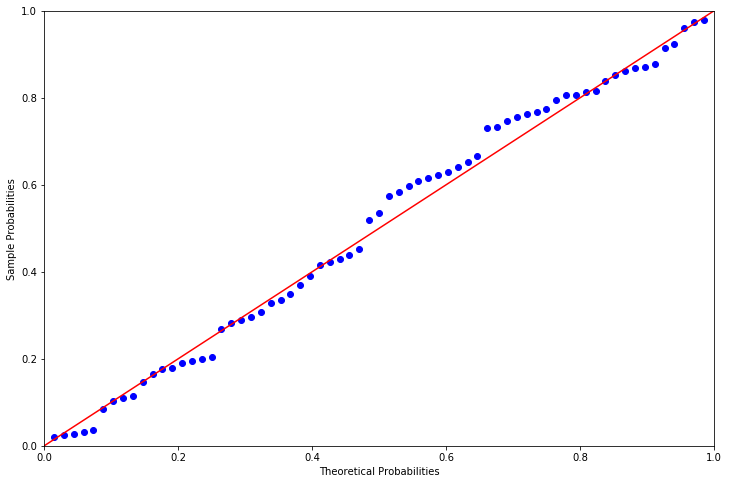

In [30]:
plt.figure(figsize=(12, 8))
plt.hist(model.resid_pearson, edgecolor='black', facecolor='lightgray')
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
plt.show()

import matplotlib as mpl

with mpl.rc_context():
    mpl.rc("figure", figsize=(12, 8))
    sm.ProbPlot(model.resid_pearson).ppplot(line='45')

plt.show()

Histograms clearly show that the residuals do not follow a normal distribution; Q-Q plot also suggests oscillations.

**Exercise 3.16**.  Suppose that a stationary time series, $\{Y_t\}$, has an autocorrelation function of the form $\rho_k = \phi^k$ for $k > 0$, where $\phi$ is a constant in the range (-1, +1).

**(a)**  Show that 

$$\text{Var}[\overline{Y}] = \frac{\gamma_0}{n} \left[ \frac{1 + \phi}{1 - \phi} - \frac{2\phi}{n} \frac{(1 - \phi^n)}{(1 - \phi)^2} \right] $$

(Hint:  Use Equation (3.2.3) on page 28, the finite geometric sum $\sum_{k=0}^n \phi^k = \frac{1 - \phi^{n+1}}{1 - \phi}$, and the related sum $\sum_{k=0}^n k \phi^{k-1} = \frac{d}{d\phi} \left[ \sum_{k=0}^n \phi^k \right]$.)

**(b)**  If $n$ is large, argue that $\text{Var}[\overline{Y}] \approx \frac{\gamma_0}{n} \left[ \frac{1 + \phi}{1 - \phi} \right]$.

**(c)**  Plot $(1 + \phi) / (1 - \phi)$ for $\phi$ for the range -1 to +1.  Interpret the plot in terms of the precision in estimating the process mean.

**Solution**.

**(a)**  Equation 3.2.3 states that

$$ \text{Var}[\overline{Y}] = \frac{\gamma_0}{n} \left[1 + 2\sum_{k=1}^{n-1} \left( 1 - \frac{k}{n} \right)\rho_k \right] $$

Replacing the given value for the autocorrelation $\rho_k$, we get

$$ 
\begin{align}
\text{Var}[\overline{Y}] 
&= \frac{\gamma_0}{n} \left[1 + 2\sum_{k=1}^{n-1} \left( 1 - \frac{k}{n} \right)\phi^k \right] \\
&= \frac{\gamma_0}{n} \left[-1 + 2\sum_{k=0}^{n-1} \phi^k - \frac{2}{n} \sum_{k=0}^{n - 1} k \phi^k \right] \\
&= \frac{\gamma_0}{n} \left[-1 + 2 \left( \frac{1 - \phi^n}{1 - \phi} \right) - \frac{2}{n} \left( \frac{(n-1)\phi^n - n \phi^{n - 1} + 1}{(1 - \phi)^2} \right) \right] \\
&= \frac{\gamma_0}{n} \left[ \frac{1 + \phi}{1 - \phi} - \frac{2\phi}{n} \frac{(1 - \phi^n)}{(1 - \phi)^2} \right]
\end{align}
$$

where we have used the geometric finite sums

$$ \sum_{k=0}^n \phi^k = \frac{1 - \phi^{n+1}}{1 - \phi}
\quad \text{and} \quad
\sum_{k=0}^n k \phi^k = \frac{d}{d\phi} \left[ \sum_{k=0}^n \phi^k \right] = \frac{(n-1)\phi^n - n \phi^{n-1} + 1}{(1 - \phi)^2} $$

and skipped the algebraic manipulation steps.

**(b)**  For large $n$, the term $- \frac{2\phi}{n} \frac{(1 - \phi^n)}{(1 - \phi)^2}$ tends to 0 with $O(n^{-1})$, and so $\text{Var}[\overline{Y}]$ goes to the specified limit.

**(c)**

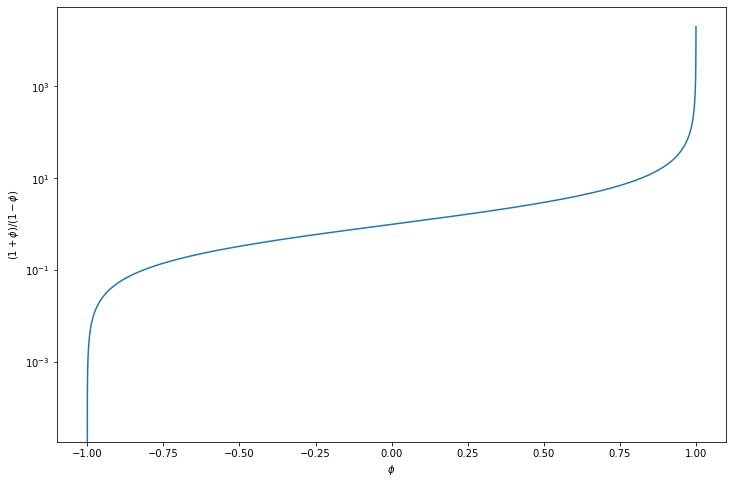

In [31]:
epsilon = 1e-4
phi = np.arange(-1, 1, step = epsilon)

plt.figure(figsize=(12, 8))
plt.plot(phi, (1 + phi) / (1 - phi))
plt.xlabel(r'$\phi$')
plt.ylabel(r'$(1 + \phi) / (1 - \phi)$')
plt.yscale('log')
plt.show()

As seen in the log plot above, the fraction goes to zero as $\phi$ approaches -1, and the fraction goes to infinity are $\phi$ approaches 1.  This indicates that the variance of the sample mean is reduced for smaller $\phi$ making easier to estimate the process mean, for the smaller $\phi$ values, while it explodes for larger $\phi$, making it more difficult to estimate the process mean.

**Exercise 3.17**.  Verify Equation (3.2.6) on page 29.  (Hint:  You will need the fact that $ \sum_{k=0}^\infty \phi^k = \frac{1}{1 - \phi}$ for $-1 < \phi < 1$.)

**Solution**.  Equation 3.2.6 states that, given that the autocorrelation is $\rho_k = \phi^{|k|}$ for all $k$,

$$ \text{Var}[\overline{Y}] \approx \frac{1 + \phi}{1 - \phi} \frac{\gamma_0}{n} $$

The result follows in almost the same manner as in exercise 3.16 (and was stated as a comment in (b)).  From it, we have:

$$ 
\text{Var}[\overline{Y}] = \frac{\gamma_0}{n} \left[ \frac{1 + \phi}{1 - \phi} - \frac{2\phi}{n} \frac{(1 - \phi^n)}{(1 - \phi)^2} \right] = \frac{\gamma_0}{n} \left[ \frac{1 + \phi}{1 - \phi} - O(n^{-1}) \right]
$$

and so the result follows.

**Exercise 3.18**.   Verify Equation (3.2.7)  on page 30.  (Hint:  you will need the two sums $\sum_{t=1}^n t = \frac{n(n+1)}{2}$ and $\sum_{t=1}^n t^2 = \frac{n(n+1)(2n + 1)}{6}$.)

**Solution**.  Equation 3.2.7 states that, for a random walk process,

$$ \text{Var}[\overline{Y}] = \sigma_e^2 (2n + 1) \frac{n + 1}{6n} $$

The result is immediate from the given deduction,

$$ \text{Var}[\overline{Y}] = \frac{1}{n^2}\text{Var}\left[\sum_{i=1}^n Y_i\right] 
= \frac{1}{n^2}\text{Var}\left[\sum_{i=1}^n \sum_{j=1}^i e_i \right]
= \frac{1}{n^2}\text{Var}\left[\sum_{k=1}^n k e_k \right]
= \frac{1}{n^2} \sum_{k=1}^n \sigma_e^2 k^2
= \sigma_e^2 (2n + 1) \frac{n + 1}{6n}
$$